In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from load_data import extract_zip
from utils import split_data

### Read Data

In [2]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
filename = 'kaggle-survey-2018.zip'
member_name = 'multipleChoiceResponses.csv'

raw = extract_zip(url, filename, member_name)
X_train, y_train, set_y = split_data(raw = raw, ycol = 'Q6')

c:\Users\Tiago Vieira\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Correlation Matrix

#### Option 1

In [30]:
(X_train
.assign(data_scientist = y_train == 'Data Scientist')
.corr(method='spearman')
.style
.background_gradient(cmap = 'RdBu', vmax=1, vmin=-1)
.set_sticky(axis='index')
)

AttributeError: 'Styler' object has no attribute 'set_sticky'

#### Option 2

In [3]:
# Correlation Matrix
corr_matrix = X_train.corr(method='spearman')
styled_corr_matrix = corr_matrix.style.background_gradient(cmap='RdBu', vmax=1, vmin=-1)
styled_corr_matrix.set_properties(**{'position': 'sticky', 'top': '0'})


,age,education,years_exp,compensation,python,r,sql,Q1_Male,Q1_Female,Q1_Prefer not to say,Q1_Prefer to self-describe,Q3_United States of America,Q3_India,Q3_China,major_cs,major_other,major_eng,major_stat
age,1.000000,0.345717,0.644863,0.451349,0.046651,0.127667,0.134325,0.014277,-0.033693,0.051232,0.041474,0.371123,-0.363626,-0.023384,-0.223529,0.201910,0.006262,0.073864
education,0.345717,1.000000,0.098849,0.241393,0.060259,0.151244,0.066620,-0.079534,0.064777,0.060984,0.002701,0.272790,-0.273408,-0.006441,-0.216724,0.164771,-0.001043,0.121294
years_exp,0.644863,0.098849,1.000000,0.255164,-0.055408,0.012090,0.050181,0.083624,-0.097564,0.034470,0.016784,0.117912,-0.136666,0.029630,-0.046551,0.018267,0.004264,0.042917
compensation,0.451349,0.241393,0.255164,1.000000,0.165070,0.171485,0.201336,0.000967,0.002912,-0.035554,0.049881,0.616759,-0.556154,-0.123281,-0.225934,0.241580,-0.060256,0.109100
python,0.046651,0.060259,-0.055408,0.165070,1.000000,0.183665,0.287957,0.039944,-0.039207,-0.006729,-0.000553,0.052339,-0.043101,-0.017642,-0.095136,0.093887,0.008640,0.013474
r,0.127667,0.151244,0.012090,0.171485,0.183665,1.000000,0.276862,-0.066982,0.068157,0.004831,-0.004454,0.178682,-0.105625,-0.133029,-0.205538,0.139994,-0.022082,0.162942
sql,0.134325,0.066620,0.050181,0.201336,0.287957,0.276862,1.000000,-0.026692,0.032639,-0.010814,-0.018499,0.166587,-0.107382,-0.108406,-0.130081,0.109862,-0.012964,0.073906
Q1_Male,0.014277,-0.079534,0.083624,0.000967,0.039944,-0.066982,-0.026692,1.000000,-0.957007,-0.222963,-0.094664,-0.144665,0.116961,0.052566,0.062605,-0.071139,0.028492,-0.039544
Q1_Female,-0.033693,0.064777,-0.097564,0.002912,-0.039207,0.068157,0.032639,-0.957007,1.000000,-0.045225,-0.019201,0.131051,-0.105490,-0.048434,-0.049753,0.064054,-0.034760,0.036779
Q1_Prefer not to say,0.051232,0.060984,0.034470,-0.035554,-0.006729,0.004831,-0.010814,-0.222963,-0.045225,1.000000,-0.004473,0.046366,-0.038587,-0.014918,-0.045908,0.010336,0.029149,0.021052


### Bar Plot

In [3]:
fig, ax = plt.subplot(figsize=(8, 4))
(X_train
.assign(data_scientist = y_train)
.groupby('r')
.data_scientist
.value_counts()
.unstack()
.plot.bar(ax=ax)
)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='major_cs'>

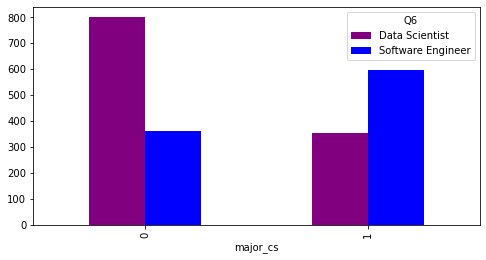

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['purple', 'blue']

crosstab_df = pd.crosstab(index=X_train['major_cs'], columns=set_y)

crosstab_df.plot.bar(ax=ax, color=colors)
